## Lab 2

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.style.use('seaborn')

#### Problem 1

##### Setup

In [2]:
# cosmic-ray background average 
X = 5.1
# gamma-ray source average 
Y = 8.9

##### A) 
Show how the probability distribution of the background changes as you integrate (sum) for more days.

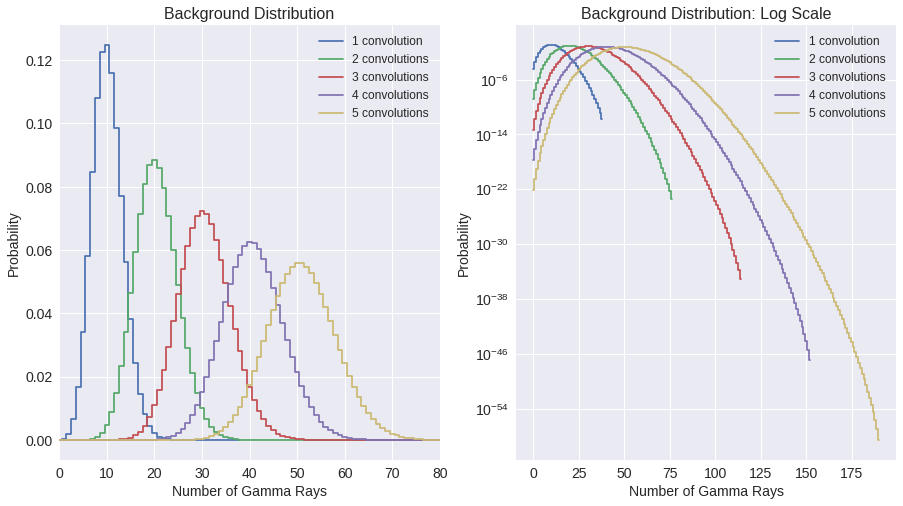

In [24]:
k = np.arange(0, 20, 1)
y = stats.poisson.pmf(k, X, loc = 0)
y = y / np.sum(y)

day_1 = np.convolve(y, y)
k1 = np.arange(0, len(day_1), 1)
day_i = day_1

fig, ax = plt.subplots(1, 2, figsize = (15, 8))

ax[0].step(k1, day_1, label="1 convolution", where='mid')
ax[1].set_yscale("log")
ax[1].step(k1, day_1, label="1 convolution", where='mid')

convolutions = 4

for i in range(convolutions):
    day_i = np.convolve(day_i, day_1)
    k_i = np.arange(0, len(day_i), 1) 
    ax[0].step(k_i, day_i, label=str(i+2)+" convolutions", where='mid')
    ax[1].step(k_i, day_i, label=str(i+2)+" convolutions", where='mid')
    

ax[0].set_xlabel("Number of Gamma Rays", fontsize=14)
ax[0].set_ylabel("Probability", fontsize=14)
ax[0].set_title("Background Distribution", fontsize=16)
ax[0].tick_params(labelsize = 14)

ax[1].set_xlabel("Number of Gamma Rays", fontsize=14)
ax[1].set_ylabel("Probability", fontsize=14)
ax[1].set_title("Background Distribution: Log Scale", fontsize=16)
ax[1].tick_params(labelsize = 14)

ax[0].legend(loc=0, fontsize=12)
ax[0].set_xlim([0, 80])

ax[1].legend(loc=0, fontsize=12)
    
plt.show()

After multiple days, the distribution is still Poisson and not Gaussian -- this is evident in the log plot, as multiple convolutions retain their rightwards tail. Mathematically this makes sense, as adding two functions of the form $e^{-\lambda}\lambda$ produce another function of $e^{-\alpha}\alpha$. Conceptually, since a single Poisson distribution is the sum of $X$ independent, identically-distributed random variables, adding another distribution of random variables just produces a larger sum.

##### B)

Looking at just the 5th day

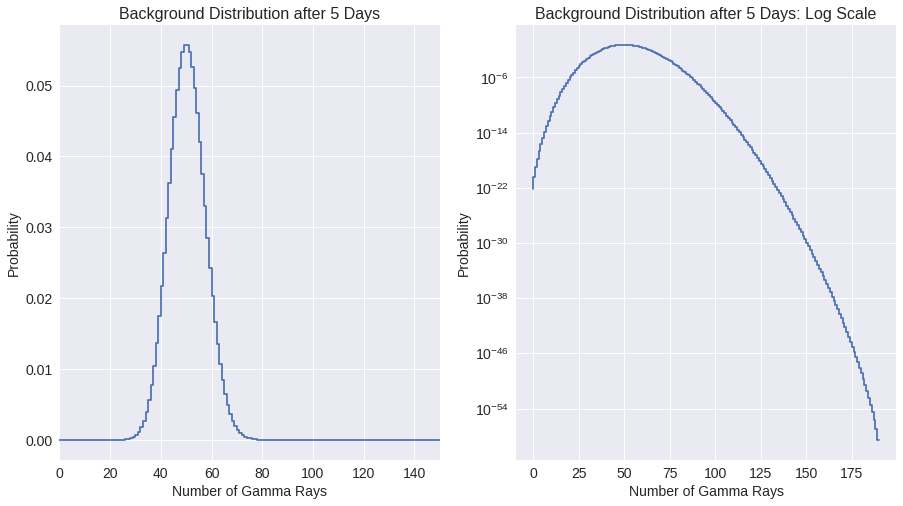

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (15, 8))

ax[0].step(k_i, day_i)
ax[0].set_xlim([0, 150])
ax[1].set_yscale("log")
ax[1].step(k_i, day_i)

ax[0].set_xlabel("Number of Gamma Rays", fontsize=14)
ax[0].set_ylabel("Probability", fontsize=14)
ax[0].set_title("Background Distribution after 5 Days", fontsize=16)
ax[0].tick_params(labelsize = 14)

ax[1].set_xlabel("Number of Gamma Rays", fontsize=14)
ax[1].set_ylabel("Probability", fontsize=14)
ax[1].set_title("Background Distribution after 5 Days: Log Scale", fontsize=16)
ax[1].tick_params(labelsize = 14)

plt.show()

The linear plot could almost be mistaken as Gaussian (though it's discreet, not continuous, and has a long rightward tail), but the log plot is obviously non-parabolic.

##### C) 

Show how the probability distribution evolves as you average days.

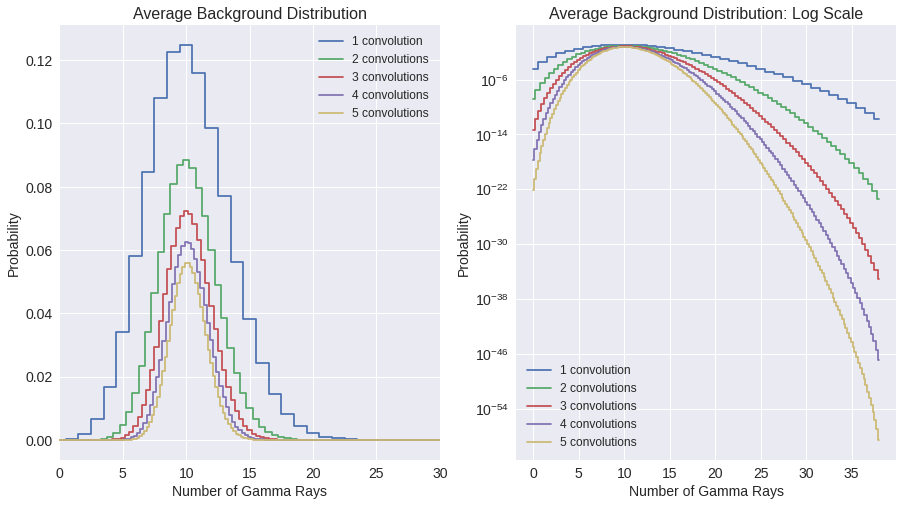

In [29]:
k = np.arange(0, 20, 1)
y = stats.poisson.pmf(k, X, loc = 0)
y = y / np.sum(y)

day_1 = np.convolve(y, y)
k1 = np.arange(0, len(day_1), 1)
day_i = day_1

fig, ax = plt.subplots(1, 2, figsize = (15, 8))

ax[0].step(k1, day_1, label="1 convolution", where='mid')
ax[1].set_yscale("log")
ax[1].step(k1, day_1, label="1 convolution", where='mid')

convolutions = 4

for i in range(convolutions):
    day_i = np.convolve(day_i, day_1)
    k_i = np.arange(0, len(day_i), 1) / (i+2) 
    ax[0].step(k_i, day_i, label=str(i+2)+" convolutions", where='mid')
    ax[1].step(k_i, day_i, label=str(i+2)+" convolutions", where='mid')
    
ax[0].legend(loc=0, fontsize=12)
ax[0].set_xlim([0, 30])

ax[0].set_xlabel("Number of Gamma Rays", fontsize=14)
ax[0].set_ylabel("Probability", fontsize=14)
ax[0].set_title("Average Background Distribution", fontsize=16)
ax[0].tick_params(labelsize = 14)

ax[1].set_xlabel("Number of Gamma Rays", fontsize=14)
ax[1].set_ylabel("Probability", fontsize=14)
ax[1].set_title("Average Background Distribution: Log Scale", fontsize=16)
ax[1].tick_params(labelsize = 14)

ax[1].legend(loc=0, fontsize=12)
    
plt.show()

The average value stays the same, with the probability of each mean shrinking at the same rate as the sum. As you average for more days, the distribution has a finer gradient and begins looking more Gaussian. There are notable differences in the log-plots of the average versus the sum; they cover the same orders of magnitude, but in regions where the value is non-negligible (not an order of $10^{-54}$, for example), the plots of the average are almost parabolic and have a less notable tail. The plots of the sum, comparably, retain their shape. This is an examcple of the central limit theorem, in which a normalized sum tends toward a Gaussian normal distribution. 

##### D)

Finding the Xσ significance of detecting 8.9 gamma rays over 30 days with the above background distribution.

**Statistical question:** what's the chance the cosmic-ray background produced a measurement as signal-like or more than my detected measurement of 8.9 after 30 days? 

Probability = 
$
\large
\int_{YN}^{\infty} pdf(x)dx = \int_{(8.9)(30)}^{\infty} pdf(x)dx
$

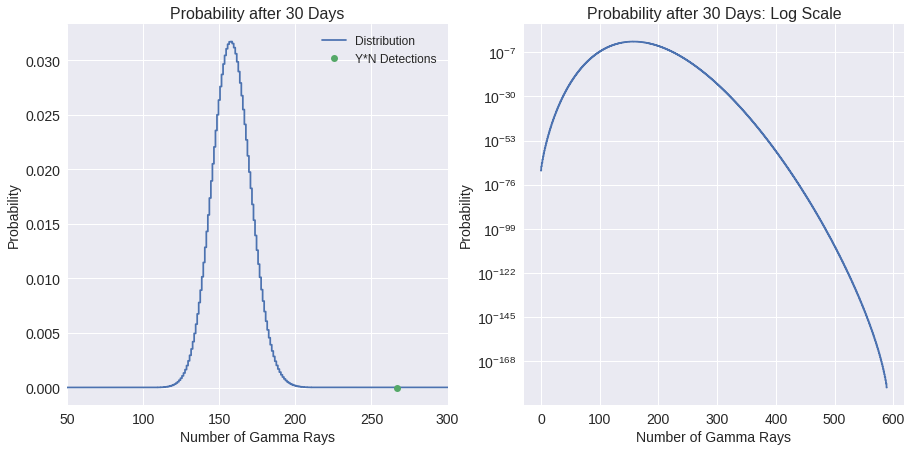

In [31]:
N = 30

k = np.arange(0, 20, 1)
y = stats.poisson.pmf(k, X, loc=0)
y = y / np.sum(y)

day_1 = y
day_N = day_1

for i in range(N):
    day_N = np.convolve(day_N, day_1)
    
k_N = np.arange(0, len(day_N), 1)

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].step(k_N, day_N, where='mid', label='Distribution')
ax[0].set_xlim([50, 300])
ax[0].set_xlabel("Number of Gamma Rays", fontsize=14)
ax[0].set_ylabel("Probability", fontsize=14)
ax[0].set_title("Probability after 30 Days", fontsize=16)
ax[0].tick_params(labelsize = 14)

ax[1].set_yscale("log")
ax[1].step(k_N, day_N, where='mid')
ax[1].set_xlabel("Number of Gamma Rays", fontsize=14)
ax[1].set_ylabel("Probability", fontsize=14)
ax[1].set_title("Probability after 30 Days: Log Scale", fontsize=16)
ax[1].tick_params(labelsize = 14)

# find the index of Y*N on the graph
index = np.where(k_N == Y*N)
ax[0].plot(Y*N, day_N[index], 'o', label="Y*N Detections")
ax[0].legend(loc=0, fontsize=12)

plt.show()

In [24]:
# Integrate that distribution

# for i in range(len(k_n)):
    
where = [True]*len(k_N)

for i in range(index[0][0]):
    where[i] = False

prob = np.sum(day_N, where=where)

sigma = stats.norm.ppf(prob, loc=0, scale=1)

print('There is a '+str(abs(round(sigma,2)))+
      'σ chance the background produced my detected value.')

There is a 7.86σ chance the background produced my detected value.


#### Problem 2

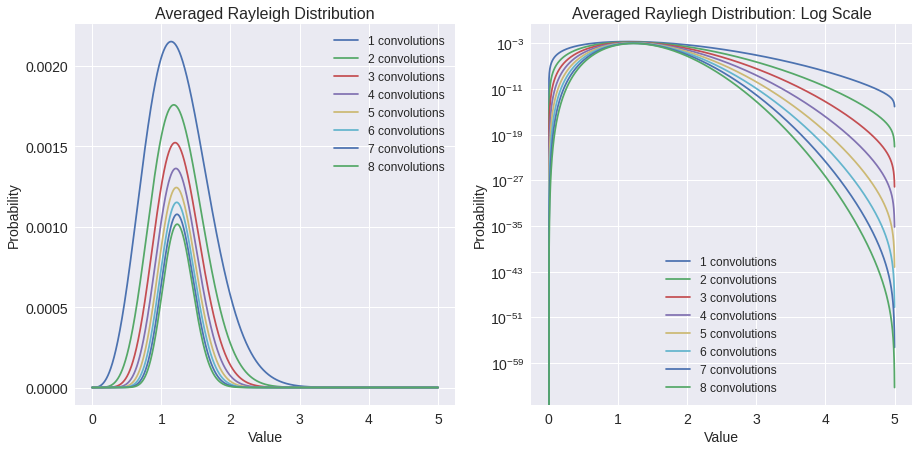

In [35]:
distr_start = 0
distr_stop = 5

k = np.linspace(distr_start, distr_stop, 1000)
y = stats.rayleigh.pdf(k, loc = 0, scale = 1)
y = y / np.sum(y)

final = y

convolutions = 8

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

for i in range (convolutions):
    final = np.convolve(final, y)
    k_final = np.linspace(distr_start, distr_stop, len(final))
    
    ax[0].plot(k_final, final, label=str(i+1)+" convolutions")
    
    ax[1].set_yscale("log")
    ax[1].plot(k_final, final, label=str(i+1)+" convolutions")
    

ax[0].set_xlabel("Value", fontsize=14)
ax[0].set_ylabel("Probability", fontsize=14)
ax[0].set_title("Averaged Rayleigh Distribution", fontsize=16)
ax[0].tick_params(labelsize = 14)

ax[1].set_xlabel("Value", fontsize=14)
ax[1].set_ylabel("Probability", fontsize=14)
ax[1].set_title("Averaged Rayliegh Distribution: Log Scale", fontsize=16)
ax[1].tick_params(labelsize = 14)
    
ax[0].legend(loc=0, fontsize = 12)
ax[1].legend(loc=0, fontsize = 12)

plt.show()

The Rayleigh Average distribution converges to a Gaussian over time similar to the Poisson. The linear plot starts looking Gaussian quickly, though the right plot still shows some skew after 8 convolutions. 

#### Problem 3

Setup: the CCD background is a zero-mean Gaussian with constant width over the image

#### Version 1

##### A)
Measured width of background Gaussian distribution X = 12, signal of strength Y = 18.2

**Statistical question:** what's the chance the thermal noise background produced a measurement as signal-like or more than my detected measurement of 18.4? 

Probability = 
$
\large
\int_{Y}^{\infty} pdf(x)dx = \int_{18.4}^{\infty} pdf(x)dx
$

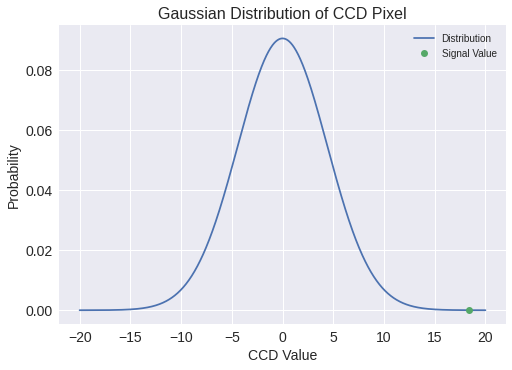

In [44]:
# background width
X = 4.4
# signal
Y = 18.4

fig, ax = plt.subplots(1,1)
x = np.linspace(-20, 20, 1000)
background_distr = stats.norm.pdf(x, loc=0, scale=X)

ax.plot(x, background_distr, label='Distribution')
ax.plot(Y, stats.norm.pdf(Y, loc=0, scale=X), 'o', label='Signal Value')

plt.xlabel("CCD Value", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.title("Gaussian Distribution of CCD Pixel", fontsize=16)
plt.tick_params(labelsize = 14)

plt.legend(loc=0)
plt.show()

In [27]:
# Calculate probability

prob = stats.norm.sf(Y, loc=0, scale=X)
sigma = stats.norm.ppf(prob, loc=0, scale=1)

print("The significance of my measurement is "+str(abs(round(sigma,2)))+
      "σ, not a discovery.")

The significance of my measurement is 4.18σ, not a discovery.


#### Version 2

##### B)

If you have to look for a signal in 10k pixels, what is the probability distribution of your background?

In [51]:
pixels = 10000

x = np.linspace(-20, 20, 1000)
background_distr = stats.norm.pdf(x, loc=0, scale=X)
orig = background_distr / np.sum(background_distr)

final_distr = orig*pixels

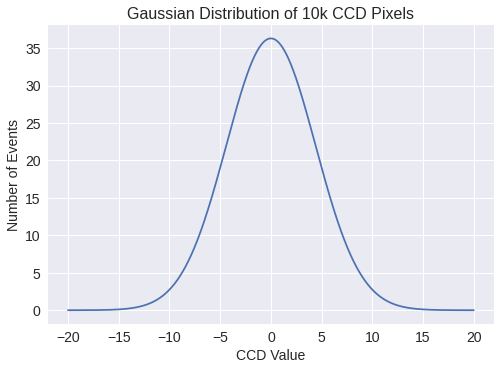

In [52]:
fig, ax = plt.subplots(1,1)
ax.plot(x, final_distr)

plt.xlabel("CCD Value", fontsize=14)
plt.ylabel("Number of Events", fontsize=14)
plt.title("Gaussian Distribution of 10k CCD Pixels", fontsize=16)
plt.tick_params(labelsize = 14)

plt.show()

This plot is a scaled version of the original that has been mulitplied by the number of pixels examined. At the tails, the number of events is approximately equal to the probability, so can be used as roughly equivalent. 

##### C)

Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.

**Statistical question:** while looking over the entire CCD, what's the chance the thermal noise background produced a measurement as signal-like or more than my detected measurement of 18.4? 

Probability = 
$
\large
\int_{Y}^{\infty} (N)pdf(x)dx = \int_{18.4}^{\infty}(10,000) pdf(x)dx
$

In [78]:
for i in range(len(x)):
    index = i
    if abs(x[index] - Y) < 0.01:
        break
        
prob = np.sum(final[index:-1])

sigma = stats.norm.ppf(prob, loc=0, scale=1)

print("The significance of my measurement is "+str(abs(round(sigma,2)))+
      "σ, not a discovery.")

The significance of my measurement is 1.18σ, not a discovery.


With a trials factor, the same candidate has a sigificance of 1.18 instead of 4.18.

### Problem 4

In [79]:
x = np.linspace(-20, 20, 1000)
background_distr = stats.norm.pdf(x, loc=0, scale=X)

##### A)

Calculate the signal required for a 5-sigma detection in Version 1

In [99]:
sigma = 5
prob = stats.norm.cdf(sigma, loc=0, scale=1)
signal = stats.norm.ppf(1 - prob, loc=0, scale=X)

print("The needed signal for a 5σ certainty while looking at a single pixel is "+str(abs(round(signal,2)))+".")

The needed signal for a 5σ looking at a single pixel is 22.0.


##### B)

Calculate the signal required for a 5-sigma detection in Version 2

In [106]:
sigma = 5
prob = stats.norm.cdf(sigma, loc=0, scale=1)
# the distribution in version 2 is scaled, so dividing by the number of pixels produces the true probability
signal = stats.norm.ppf((1 - prob) / pixels, loc=0, scale=X)

print("The needed signal for a 5σ certainty while looking at 10k pixels is "+str(abs(round(signal,2)))+".")

The needed signal for a 5σ certainty while looking at 10k pixels is 28.82.


##### C) 

The signal must be 1.3 times greater to claim signficance with a trials factor of 10k. 

In the first case, we can easily invert the steps to find the significance of a measurement by finding the standard normal probability at 5 sigma. From this probability we can use the *ppf* function on the background distribution to find the measurement at that probability. Since ppf inverse-integrates from the left and the distribution is symmetric, using (1 - probability) will produce the correct (if negative) signal. 

In the second case, the distribution is scaled up by 10,000 pixels. It will be less probable to find a signal value when looking over several pixels, so we must divide the probability by 10,000. Otherwise the process is the same. 

##### D)

In [112]:
trials_factor = 1000000
sigma = 5
prob = stats.norm.cdf(sigma, loc=0, scale=1)
# the distribution in version 2 is scaled, so dividing by the number of pixels produces the true probability
signal = stats.norm.ppf((1 - prob) / trials_factor, loc=0, scale=X)

print("The needed signal for a 5σ certainty while looking at 1,000,000 pixels is "+str(abs(round(signal,2)))+".")

The needed signal for a 5σ certainty while looking at 1,000,000 pixels is 31.71.


Increasing the trials factor by two orders of magnitude only increases the required signal by a factor of 1.1. The trials factor would have to be monumental to increase the required signal by an order of magnitude.